Собственные зачения и собственные функции для осциляторного потенциала

In [5]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from math import pi

In [6]:
h = 6.62607015e-34 # Дж * с
h_bar = h / (2*pi)
m = 9.109e-31    
omega = 1e16
a = 8e-10
x_min = -a
x_max = a
N = 1000

Гамильтониан

$$ \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + \frac{m\omega^2x^2}{2} $$

Аппроксимация второй производной

<tex>$${{d^2f}\over{dx^2}} \approx {f(x - dx) - 2f(x) + {f(x + dx)}\over{dx^2}}$$<tex>

In [7]:
# Создание сетки значений координаты
xs = np.linspace(x_min, x_max, N)

# Вычисление расстояния между узлами сетки
dx = xs[1] - xs[0]

# Гамильтониан
H = np.zeros((N, N))
c = -(h_bar**2)/(2*m*(dx**2))
for i in range(N):
    x = xs[i]
    H[i][i] = c*(-2) + m*(omega**2)*(x**2)/2
    if i > 0:
        H[i][i-1] = c
    if i < N - 1:
        H[i][i+1] = c

E1: 5.272786069278678e-19
E2: 1.5818212165780243e-18
E3: 2.636334617225687e-18
E4: 3.690818807651698e-18


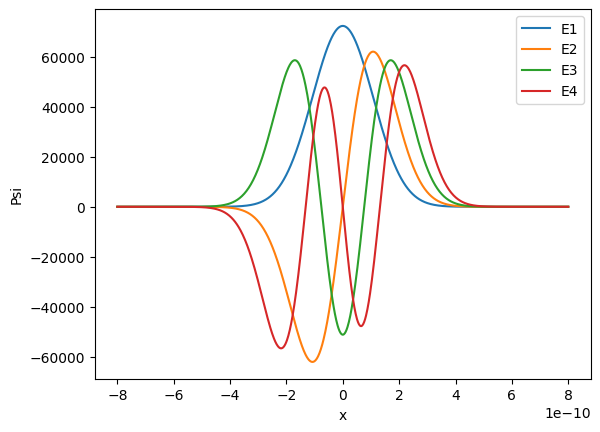

In [8]:
# Вычисление собственных значений и собственных векторов оператора Гамильтона
eigenvalues, eigenvectors = eigh(H)

for i in range(4):
    # Нормализуем пси функцию
    psi_values = eigenvectors[:, i]
    psi_values = psi_values / (np.square(psi_values).sum() * dx)**(1/2)

    plt.plot(xs, psi_values, label=f'E{i+1}')
    print(f'E{i+1}: {eigenvalues[i]}')
plt.legend()
plt.xlabel('x')
plt.ylabel('Psi')
plt.show()

In [9]:
Es = eigenvalues

Моделирование с добавлением тонкой высокой стенки в точке x=0

In [10]:
i_partition = N // 2
U_partition = 1

# Гамильтониан
H = np.zeros((N, N))
c = -(h_bar**2)/(2*m*(dx**2))
for i in range(N):
    x = xs[i]
    u = m*(omega**2)*(x**2)/2 if i != i_partition else U_partition
    H[i][i] = c*(-2) + u
    if i > 0:
        H[i][i-1] = c
    if i < N - 1:
        H[i][i+1] = c

In [11]:
eigenvalues, eigenvectors = eigh(H)
Es_with_partition = eigenvalues

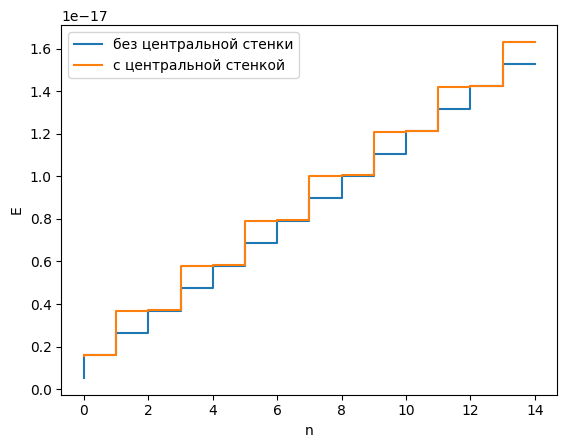

In [12]:
plt.plot(Es[:15], drawstyle='steps-pre', label='без центральной стенки')
plt.plot(Es_with_partition[:15], drawstyle='steps-pre', label='c центральной стенкой')
plt.xlabel("n")
plt.ylabel("E")
plt.legend()
plt.show()